# FDS project 21/22 - Heart Disease Prediction

### Authors
- Elios Buzo
- Laurentiu Adrian Crsturean
- Anthony Giusti
- Ludovico Lentini
- Michele Spina

# Clean and analyze the dataset

## A first look

### What type of thata there are

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets, metrics, model_selection, svm

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

from sklearn import metrics

from gd_functions import *
from gaussian_discriminant_analysis import *

In [2]:
#Import the original dataset
df = pd.read_csv('dataset.csv')
#df.head()

#Print the number of null values
df.isnull().sum()
#df.info()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We can immediatly observe that there are some categorical values and there isn't null values, but we must analyze if all the data are consistent

In [4]:
df.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


The minimum value for the attribute **Cholesterol** and **RestingBP** is 0 and it isn't consisten.

In [5]:
print(np.sum(np.asarray(df["Cholesterol"] == 0)))

172


In [6]:
print(np.sum(np.asarray(df["RestingBP"] == 0)))

1


### How data are distributed

The same graphs but in only one plot

<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

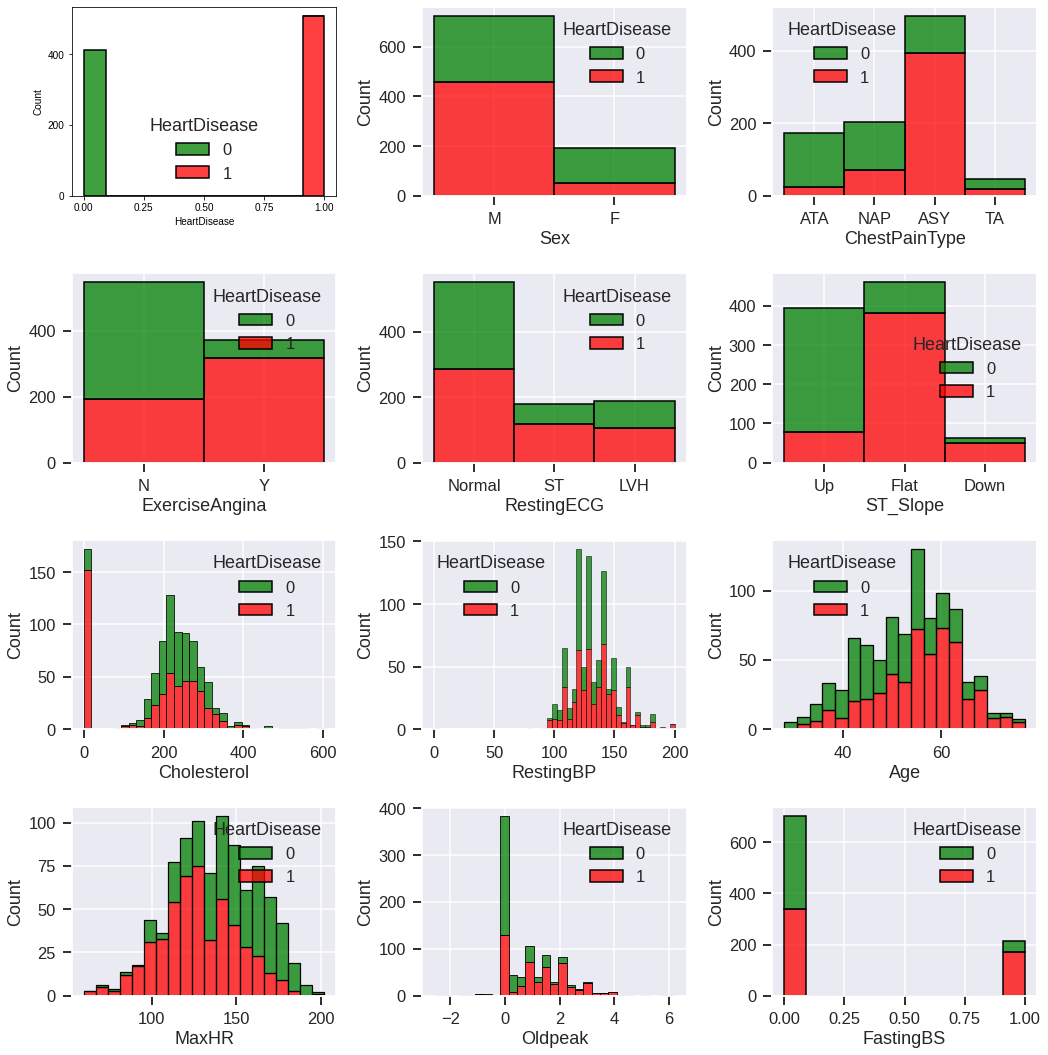

In [7]:
oe=['g','r']
fig = plt.figure(figsize=(15,15))

plt.subplot(4,3,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="HeartDisease", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Sex", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ChestPainType", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ExerciseAngina", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="RestingECG", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ST_Slope", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,7)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Cholesterol", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,8)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="RestingBP", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,9)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Age", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,10)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="MaxHR", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,11)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Oldpeak", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,12)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="FastingBS", hue="HeartDisease",multiple="stack",palette=oe)


<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

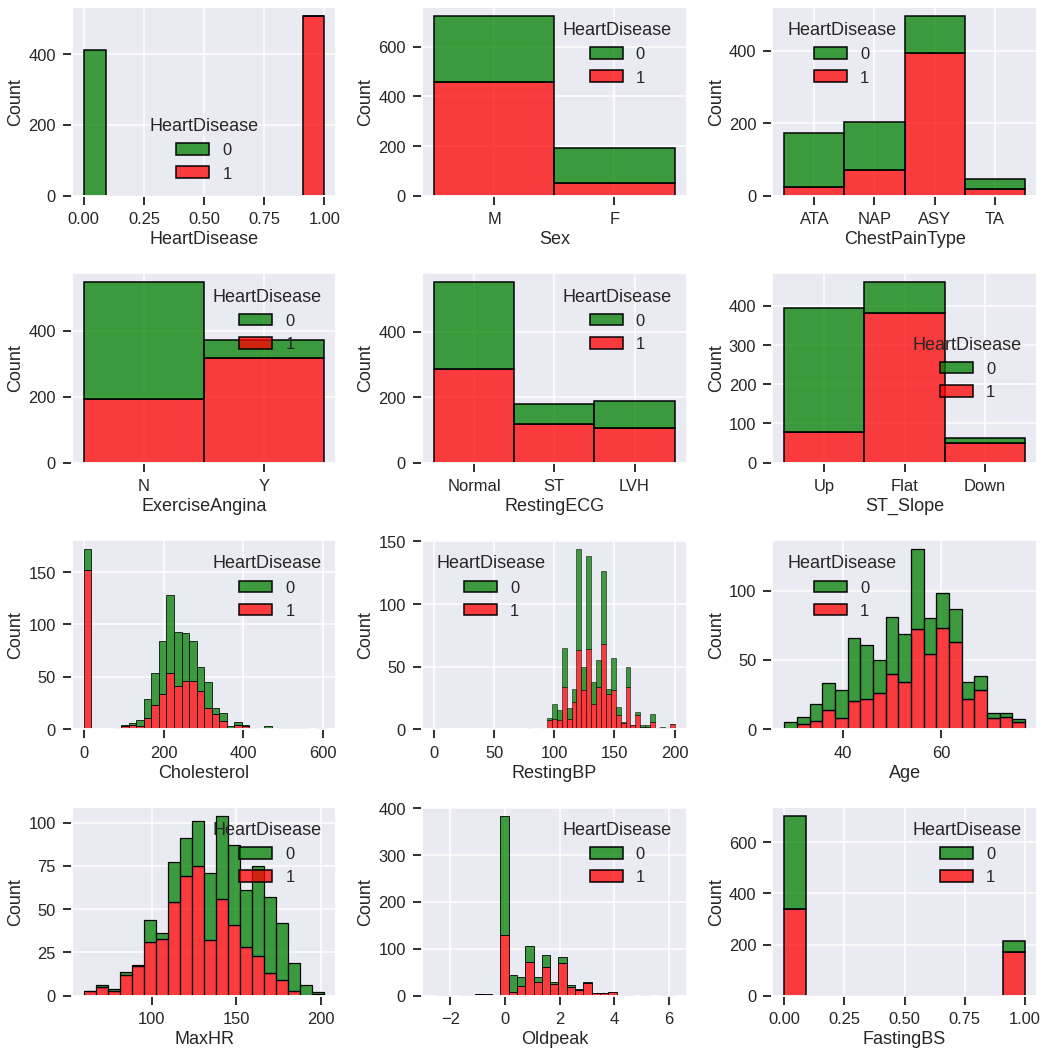

In [8]:
oe=['g','r']
fig = plt.figure(figsize=(15,15))

plt.subplot(4,3,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="HeartDisease", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Sex", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ChestPainType", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ExerciseAngina", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="RestingECG", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ST_Slope", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,7)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Cholesterol", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,8)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="RestingBP", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,9)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Age", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,10)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="MaxHR", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,11)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Oldpeak", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,12)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="FastingBS", hue="HeartDisease",multiple="stack",palette=oe)


## From categorical to numeric

We must convert categorical data to numerical data

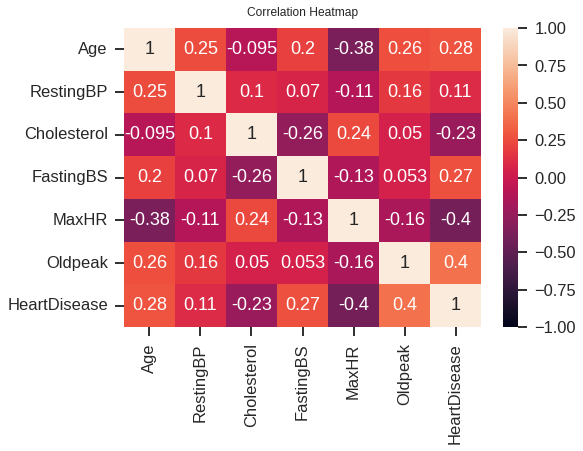

In [9]:
'''
I want rappresent the heatmap here
Maybe we should do that after clean the dataset or show two differents heatmap: one whitout cholesterol 
and one only with colesterol, deleting rows with value 0
'''
onlyNumeric = pd.read_csv('dataset.csv')
onlyNumeric = onlyNumeric
del onlyNumeric["ChestPainType"]
del onlyNumeric["RestingECG"]
del onlyNumeric["ST_Slope"]
del onlyNumeric["ExerciseAngina"]
del onlyNumeric["Sex"]

#onlyNumeric.style.background_gradient(cmap ='viridis')\
        #.set_properties(**{'font-size': '20px'})
#df.columns
#df.drop(df.columns['ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope','Sex']), axis=1).set_index('Age')
#corr = onlyNumeric.corr()
#sns.heatmap(corr, annot = True)
#sns.heatmap(onlyNumeric, annot=True)

heatmap = sns.heatmap(onlyNumeric.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

This is useful https://pbpython.com/categorical-encoding.html

In [10]:
'''
cleanup_nums = {"Sex":     {"M": 0, "F": 1},
                "ChestPainType": {"TA": 0, "ATA": 1, "NAP": 2, "ASY": 8},
                "RestingECG": {"Normal": 0, "ST": 1, "LVH": 2},
                "ExerciseAngina": {"N": 0, "Y": 1},
                "ST_Slope": {"Down": 0, "Flat": 1, "Up": 2}
               }

df = df.replace(cleanup_nums)
df.head
'''
df = pd.get_dummies(df)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


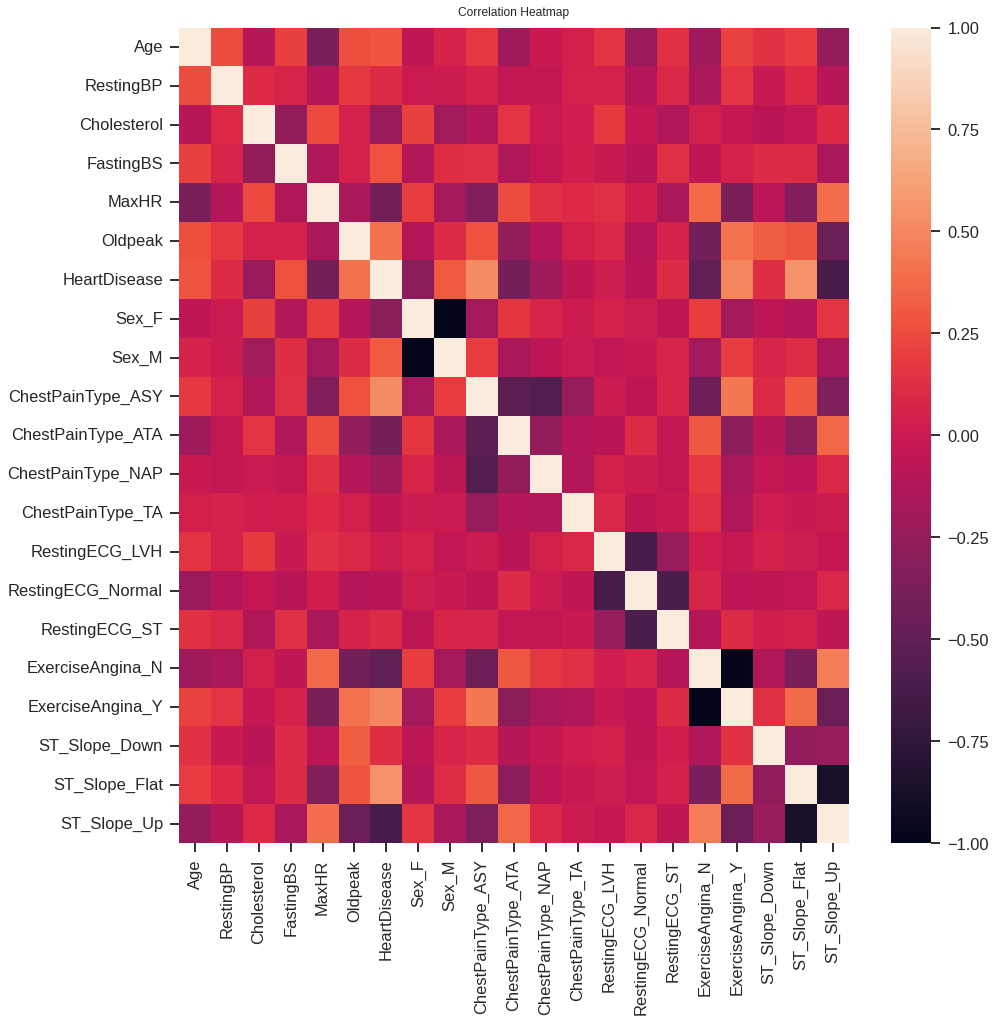

In [11]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

#corr = df.corr()
#sns.heatmap(corr, annot = True, linewidths=.5, ax=ax)

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


## How can we manage inconsisten values?

This link contains some useful ways:
https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

### Deleting the columns with missing data

In [12]:

df_noC = df.copy()
#df_noC = df_noC.replace(cleanup_nums)
df_noC = df_noC.drop(df_noC[df_noC.RestingBP == 0].index)
del df_noC["Cholesterol"]
#del df_noC["RestingBP"]
df_noC.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                917 non-null    int64  
 1   RestingBP          917 non-null    int64  
 2   FastingBS          917 non-null    int64  
 3   MaxHR              917 non-null    int64  
 4   Oldpeak            917 non-null    float64
 5   HeartDisease       917 non-null    int64  
 6   Sex_F              917 non-null    uint8  
 7   Sex_M              917 non-null    uint8  
 8   ChestPainType_ASY  917 non-null    uint8  
 9   ChestPainType_ATA  917 non-null    uint8  
 10  ChestPainType_NAP  917 non-null    uint8  
 11  ChestPainType_TA   917 non-null    uint8  
 12  RestingECG_LVH     917 non-null    uint8  
 13  RestingECG_Normal  917 non-null    uint8  
 14  RestingECG_ST      917 non-null    uint8  
 15  ExerciseAngina_N   917 non-null    uint8  
 16  ExerciseAngina_Y   917 non

In [13]:
df_noC.describe()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,0.233370,136.789531,0.886696,0.552890,0.210469,0.789531,0.540894,0.188659,0.220284,0.050164,0.205016,0.600872,0.194111,0.595420,0.404580,0.068702,0.500545,0.430752
std,9.437636,17.999749,0.423206,25.467129,1.066960,0.497466,0.407864,0.407864,0.498597,0.391451,0.414664,0.218401,0.403934,0.489986,0.395731,0.491078,0.491078,0.253085,0.500273,0.495452
min,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,0.000000,120.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,0.000000,138.000000,0.600000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,0.000000,156.000000,1.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

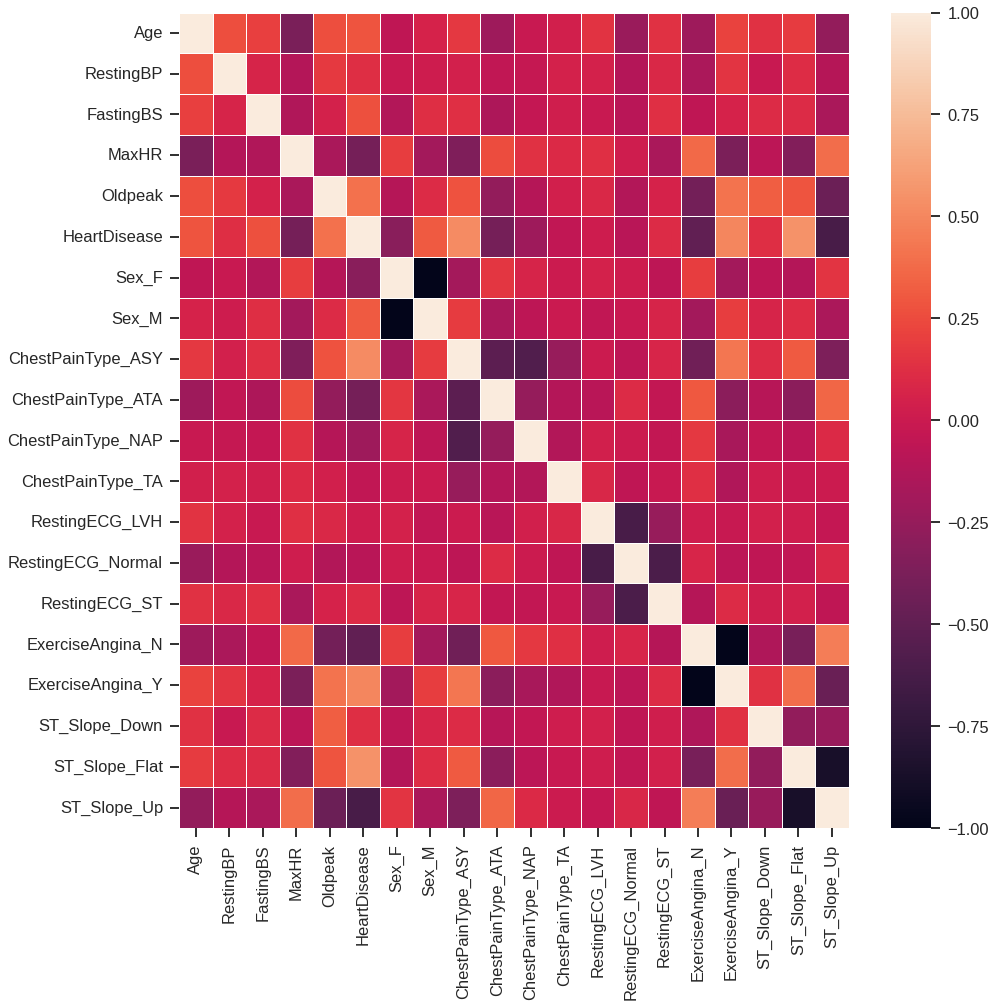

In [14]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

corr = df_noC.corr()
sns.heatmap(corr, annot = False, linewidths=.5, ax=ax)

### Deleting the rows with missing data

In [15]:
#df_noR = pd.read_csv('dataset.csv')
df_noR = df.drop(df[df.Cholesterol == 0].index)
df_noR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                746 non-null    int64  
 1   RestingBP          746 non-null    int64  
 2   Cholesterol        746 non-null    int64  
 3   FastingBS          746 non-null    int64  
 4   MaxHR              746 non-null    int64  
 5   Oldpeak            746 non-null    float64
 6   HeartDisease       746 non-null    int64  
 7   Sex_F              746 non-null    uint8  
 8   Sex_M              746 non-null    uint8  
 9   ChestPainType_ASY  746 non-null    uint8  
 10  ChestPainType_ATA  746 non-null    uint8  
 11  ChestPainType_NAP  746 non-null    uint8  
 12  ChestPainType_TA   746 non-null    uint8  
 13  RestingECG_LVH     746 non-null    uint8  
 14  RestingECG_Normal  746 non-null    uint8  
 15  RestingECG_ST      746 non-null    uint8  
 16  ExerciseAngina_N   746 non

In [16]:
df_noR.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,...,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212,0.243968,0.756032,0.495979,...,0.226542,0.054960,0.235925,0.596515,0.167560,0.615282,0.384718,0.057641,0.474531,0.467828
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816,0.429762,0.429762,0.500319,...,0.418874,0.228055,0.424860,0.490926,0.373726,0.486855,0.486855,0.233219,0.499686,0.499299
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.210240,0.789760,0.540305,...,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.407701,0.498645,...,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

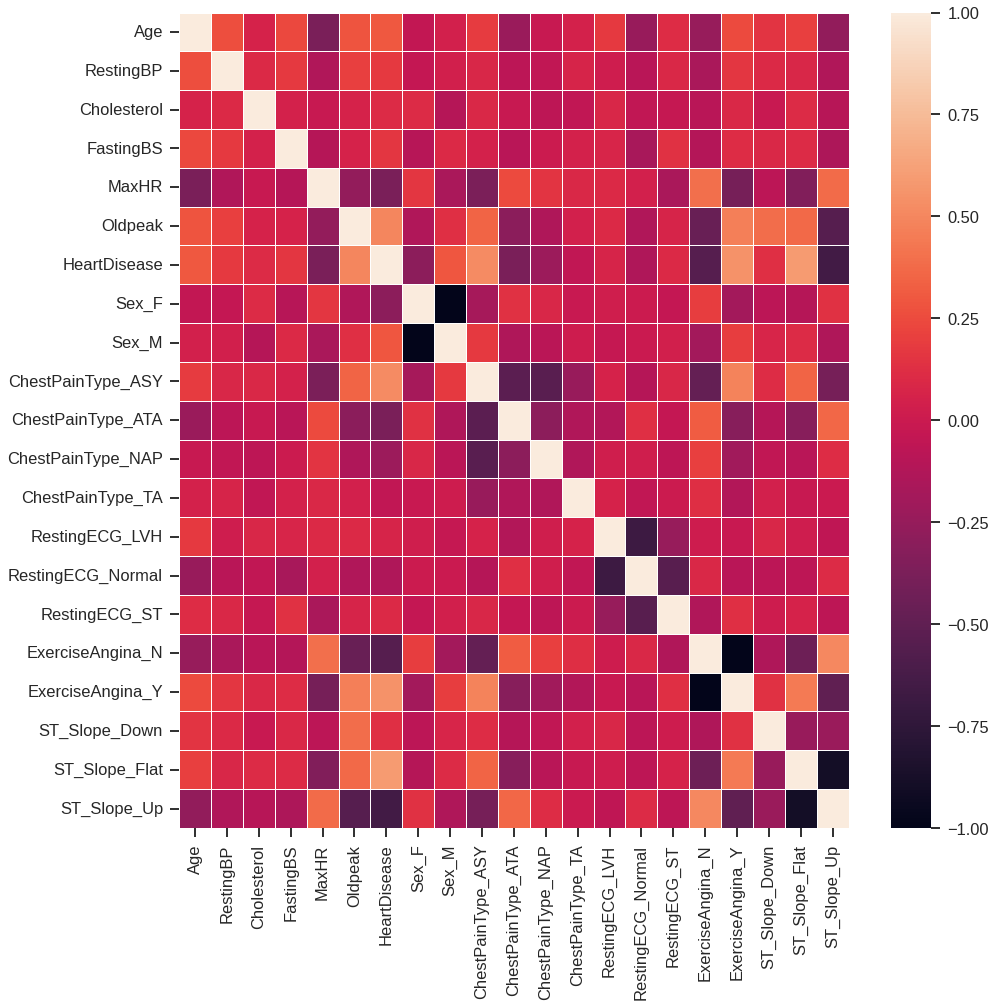

In [18]:
fig, ax = plt.subplots(figsize=(15,15)) 
corr = df_noR.corr()
sns.heatmap(corr, annot = False, linewidths=.5, ax=ax)

### Filling the Missing Values – Imputation

WE SHOULD FIND A WAY TO REPLACE 0 WITH THE MEAN VALUE ON CHOLESTEROL AND RESTINGBP

In [19]:
'''
df_fill = df
df_fill.Cholesterol.replace(0, 244.635389)
df_fill["RestingBP"].replace(0, 133.022788)
df_fill.describe()
'''
cleanup_inconsisten = {"Cholesterol":     {0: 244.635389},
                "RestingBP":      {0: 133.022788},
               }
df_mean = df.replace(cleanup_inconsisten)

In [20]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.210240,0.789760,0.540305,...,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.407701,0.498645,...,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df_mean.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.541419,244.635389,0.233115,136.809368,0.887364,0.553377,0.210240,0.789760,0.540305,...,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283
std,9.432617,17.989939,53.318029,0.423046,25.460334,1.066570,0.497414,0.407701,0.407701,0.498645,...,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Imputation with an additional column

In [22]:
df_extraC = df.copy()
df_extraC['CholesterolIsMissing'] = df_extraC['Cholesterol'] == 0
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = 'median')
#data_new = my_imputer.fit_transform(df_extraC)

cleanup_inconsisten = {"Cholesterol":     {0: 244.635389},
                "RestingBP":      {0: 133.022788},
                'CholesterolIsMissing': {False: 0, True: 1},
               }
df_extraC = df_extraC.replace(cleanup_inconsisten)
#df_extraC = df_extraC.replace(cleanup_nums)

df_extraC.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,CholesterolIsMissing
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.541419,244.635389,0.233115,136.809368,0.887364,0.553377,0.210240,0.789760,0.540305,...,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283,0.187364
std,9.432617,17.989939,53.318029,0.423046,25.460334,1.066570,0.497414,0.407701,0.407701,0.498645,...,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386,0.390416
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='CholesterolIsMissing', ylabel='Count'>

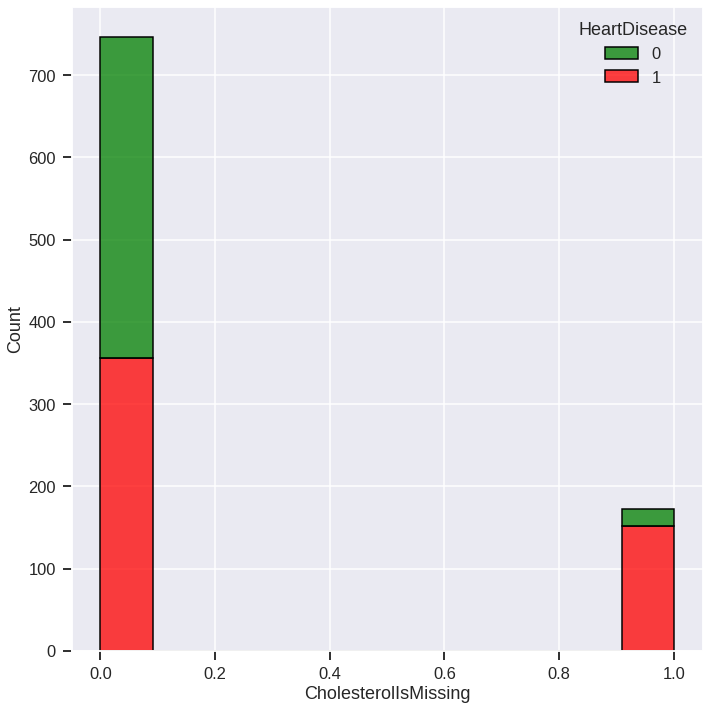

In [23]:
oe=['g','r']
fig = plt.figure(figsize=(10,10))

plt.subplot(1,1,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df_extraC, x="CholesterolIsMissing", hue="HeartDisease",multiple="stack",palette=oe)

### Filling with a Regression Model

In [24]:
df_RM = df.copy()
lr = LinearRegression()
X_test_RM = df_RM[df_RM['Cholesterol']==0] #The ones we need to predict
X_train_RM = df_RM[df_RM['Cholesterol']!=0] #The ones used for training
y = X_train_RM['Cholesterol'] #cholesterol values
hd_train = X_train_RM['HeartDisease']
hd_test = X_test_RM['HeartDisease']
X_train_RM.describe()
del X_train_RM["Cholesterol"]
del X_train_RM["HeartDisease"]
lr.fit(X_train_RM,y) #Fit available cholesterol with it's data
del X_test_RM["Cholesterol"]
del X_test_RM["HeartDisease"]
pred = lr.predict(X_test_RM) # Predict the missing values
X_test_RM.info()
X_test_RM['Cholesterol']= pred #Assign the new values creating again the column Cholesterol
X_train_RM['Cholesterol']= y # Assign again the old cholesterol values 
X_test_RM['HeartDisease']= hd_test #Assign the new values creating again the column Cholesterol
X_train_RM['HeartDisease']= hd_train # Assign again the old cholesterol values 
df_RM = pd.concat([X_test_RM, X_train_RM], ignore_index=True, sort=False) # concatenate both charts, the one with predicted
#test = pd.concat([X_test_RM, pred, hd_test], axis=1).reindex(X_test_RM.index)
#train = pd.concat([X_train_RM, y, hd_train], axis=1).reindex(X_train_RM.index)
#df_RM = pd.concat([test, train], ignore_index=True, sort=False) # concatenate both charts, the one with predicted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 293 to 536
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                172 non-null    int64  
 1   RestingBP          172 non-null    int64  
 2   FastingBS          172 non-null    int64  
 3   MaxHR              172 non-null    int64  
 4   Oldpeak            172 non-null    float64
 5   Sex_F              172 non-null    uint8  
 6   Sex_M              172 non-null    uint8  
 7   ChestPainType_ASY  172 non-null    uint8  
 8   ChestPainType_ATA  172 non-null    uint8  
 9   ChestPainType_NAP  172 non-null    uint8  
 10  ChestPainType_TA   172 non-null    uint8  
 11  RestingECG_LVH     172 non-null    uint8  
 12  RestingECG_Normal  172 non-null    uint8  
 13  RestingECG_ST      172 non-null    uint8  
 14  ExerciseAngina_N   172 non-null    uint8  
 15  ExerciseAngina_Y   172 non-null    uint8  
 16  ST_Slope_Down      172 n

/tmp/ipykernel_7170/2762210653.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_RM['Cholesterol']= pred #Assign the new values creating again the column Cholesterol
/tmp/ipykernel_7170/2762210653.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_RM['Cholesterol']= y # Assign again the old cholesterol values
/tmp/ipykernel_7170/2762210653.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [25]:
df_RM.describe()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Cholesterol,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,0.233115,136.809368,0.887364,0.210240,0.789760,0.540305,0.188453,0.221133,...,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283,244.238561,0.553377
std,9.432617,18.514154,0.423046,25.460334,1.066570,0.407701,0.407701,0.498645,0.391287,0.415236,...,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386,53.607807,0.497414
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,0.000000
25%,47.000000,120.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214.000000,0.000000
50%,54.000000,130.000000,0.000000,138.000000,0.600000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,240.142697,1.000000
75%,60.000000,140.000000,0.000000,156.000000,1.500000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,268.000000,1.000000
max,77.000000,200.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,603.000000,1.000000


### Results

In [26]:
def clean(way, X_train, X_test,y_train,y_test):
    my_X_train = X_train.copy()
    my_X_test = X_test.copy()
    my_y_train = y_train.copy()
    my_y_test = y_test.copy()
    if way == "delCols":
        return delCols(my_X_train, my_X_test, my_y_train,my_y_test)
    elif way == "delRows":
        return delRows(my_X_train, my_X_test, my_y_train,my_y_test)
    elif way == "addMean":
        return addMean(my_X_train, my_X_test, my_y_train,my_y_test)
    elif way == "addCol":
        return addCol(my_X_train, my_X_test, my_y_train,my_y_test)
    #elif way== "lr":
        #return lr(my_X_train, my_X_test, my_y_train,my_y_test)
    else:
        return my_X_train, my_X_test, my_y_train,my_y_test
    
def delCols(X_train, X_test,y_train,y_test):
    y_train = y_train.drop(X_train[X_train.RestingBP==0].index)
    X_train = X_train.drop(X_train[X_train.RestingBP==0].index)
    y_test = y_test.drop(X_test[X_test.RestingBP==0].index)
    X_test = X_test.drop(X_test[X_test.RestingBP==0].index)
    del X_train["Cholesterol"]
    del X_test["Cholesterol"]
    dfmin = pd.concat([X_train.min(), X_test.min()], axis=1).min(axis=1)
    dfmax = pd.concat([X_train.max(), X_test.max()], axis=1).max(axis=1)
    X_train = (X_train-dfmin)/(dfmax-dfmin)
    X_test = (X_test-dfmin)/(dfmax-dfmin)
    
    return X_train, X_test,y_train,y_test

def delRows(X_train, X_test,y_train,y_test):
    y_train = y_train.drop(X_train[X_train.Cholesterol==0].index)
    X_train = X_train.drop(X_train[X_train.Cholesterol==0].index)
    y_test = y_test.drop(X_test[X_test.Cholesterol==0].index)
    X_test = X_test.drop(X_test[X_test.Cholesterol==0].index)
    dfmin = pd.concat([X_train.min(), X_test.min()], axis=1).min(axis=1)
    dfmax = pd.concat([X_train.max(), X_test.max()], axis=1).max(axis=1)
    X_train = (X_train-dfmin)/(dfmax-dfmin)
    X_test = (X_test-dfmin)/(dfmax-dfmin)
    return X_train, X_test,y_train,y_test
 
def addMean(X_train, X_test,y_train,y_test):
    cleanup_inconsisten = {"Cholesterol":     {0: 244.635389},
                "RestingBP":      {0: 133.022788},
               }
    X_train = X_train.replace(cleanup_inconsisten)
    X_test = X_test.replace(cleanup_inconsisten)
    dfmin = pd.concat([X_train.min(), X_test.min()], axis=1).min(axis=1)
    dfmax = pd.concat([X_train.max(), X_test.max()], axis=1).max(axis=1)
    X_train = (X_train-dfmin)/(dfmax-dfmin)
    X_test = (X_test-dfmin)/(dfmax-dfmin)
    return X_train, X_test,y_train,y_test    

def addCol(X_train, X_test,y_train,y_test):

    X_train['CholesterolIsMissing'] = X_train['Cholesterol'] == 0
    X_test['CholesterolIsMissing'] = X_test['Cholesterol'] == 0
    cleanup_inconsisten = {"Cholesterol":     {0: 244.635389},
                "RestingBP":      {0: 133.022788},
                'CholesterolIsMissing': {False: 0, True: 1},
               }
    X_train = X_train.replace(cleanup_inconsisten)
    X_test = X_test.replace(cleanup_inconsisten)
    dfmin = pd.concat([X_train.min(), X_test.min()], axis=1).min(axis=1)
    dfmax = pd.concat([X_train.max(), X_test.max()], axis=1).max(axis=1)
    X_train = (X_train-dfmin)/(dfmax-dfmin)
    X_test = (X_test-dfmin)/(dfmax-dfmin)
    return X_train, X_test, y_train, y_test    
'''
def lr(my_X_train, my_X_test, my_y_train,my_y_test):
    y_train = y_train.drop(X_train[X_train.RestingBP==0].index)
    X_train = X_train.drop(X_train[X_train.RestingBP==0].index)
    y_test = y_test.drop(X_test[X_test.RestingBP==0].index)
    X_test = X_test.drop(X_test[X_test.RestingBP==0].index)
'''   

'\ndef lr(my_X_train, my_X_test, my_y_train,my_y_test):\n    y_train = y_train.drop(X_train[X_train.RestingBP==0].index)\n    X_train = X_train.drop(X_train[X_train.RestingBP==0].index)\n    y_test = y_test.drop(X_test[X_test.RestingBP==0].index)\n    X_test = X_test.drop(X_test[X_test.RestingBP==0].index)\n'

Applying the **LINEAR REGRESSION**, what is the best dataset?

In [27]:
y = df['HeartDisease']
df.drop("HeartDisease",axis=1,inplace=True)
dfmin = df.min()
dfmax = df.max()
X_train, X_test,y_train,y_test = train_test_split(df,y,test_size=0.25)
X_train_delCols, X_test_delCols,y_train_delCols,y_test_delCols = clean("delCols", X_train, X_test,y_train,y_test)
X_train_delRows, X_test_delRows,y_train_delRows,y_test_delRows = clean("delRows", X_train, X_test,y_train,y_test)
X_train_addMean, X_test_addMean,y_train_addMean,y_test_addMean = clean("addMean", X_train, X_test,y_train,y_test)
X_train_addCol, X_test_addCol, y_train_addCol, y_test_addCol = clean("addCol", X_train, X_test,y_train,y_test)

In [28]:
X_train_delCols.describe()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,0.519859,0.436402,0.218341,0.542674,0.396619,0.202329,0.797671,0.535662,0.192140,0.228530,0.043668,0.203785,0.602620,0.193595,0.580786,0.419214,0.071325,0.496361,0.432314
std,0.193256,0.153282,0.413421,0.179655,0.122803,0.402029,0.402029,0.499090,0.394269,0.420192,0.204505,0.403104,0.489712,0.395403,0.493790,0.493790,0.257554,0.500351,0.495758
min,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.333333,0.000000,0.422535,0.295455,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530612,0.416667,0.000000,0.556338,0.363636,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.673469,0.500000,0.000000,0.683099,0.465909,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
X_train_delRows.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,0.504180,0.377708,0.305928,0.150268,0.536431,0.159043,0.234347,0.765653,0.493739,0.223614,0.234347,0.048301,0.236136,0.601073,0.162791,0.601073,0.398927,0.059034,0.475850,0.465116
std,0.193837,0.162706,0.115641,0.357654,0.185448,0.172518,0.423969,0.423969,0.500409,0.417039,0.423969,0.214593,0.425087,0.490116,0.369505,0.490116,0.490116,0.235899,0.499864,0.499228
min,0.020408,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.367347,0.259259,0.233591,0.000000,0.402256,0.015873,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530612,0.351852,0.291506,0.000000,0.533835,0.111111,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.632653,0.444444,0.364865,0.000000,0.684211,0.253968,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
X_train_addMean.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.00000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.519904,0.436410,0.306349,0.218023,0.542857,0.396720,0.202035,0.797965,0.534884,0.19186,0.229651,0.043605,0.203488,0.603198,0.193314,0.581395,0.418605,0.071221,0.497093,0.431686
std,0.193119,0.153170,0.104223,0.413204,0.179589,0.122743,0.401810,0.401810,0.499145,0.39405,0.420915,0.204362,0.402886,0.489590,0.395184,0.493689,0.493689,0.257381,0.500355,0.495672
min,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.333333,0.249035,0.000000,0.422535,0.295455,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530612,0.416667,0.308176,0.000000,0.556338,0.363636,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.673469,0.500000,0.347490,0.000000,0.683099,0.465909,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X_train_addCol.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,CholesterolIsMissing
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.00000,...,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.519904,0.436410,0.306349,0.218023,0.542857,0.396720,0.202035,0.797965,0.534884,0.19186,...,0.043605,0.203488,0.603198,0.193314,0.581395,0.418605,0.071221,0.497093,0.431686,0.187500
std,0.193119,0.153170,0.104223,0.413204,0.179589,0.122743,0.401810,0.401810,0.499145,0.39405,...,0.204362,0.402886,0.489590,0.395184,0.493689,0.493689,0.257381,0.500355,0.495672,0.390596
min,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.333333,0.249035,0.000000,0.422535,0.295455,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530612,0.416667,0.308176,0.000000,0.556338,0.363636,0.000000,1.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.673469,0.500000,0.347490,0.000000,0.683099,0.465909,0.000000,1.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


0.8608695652173913


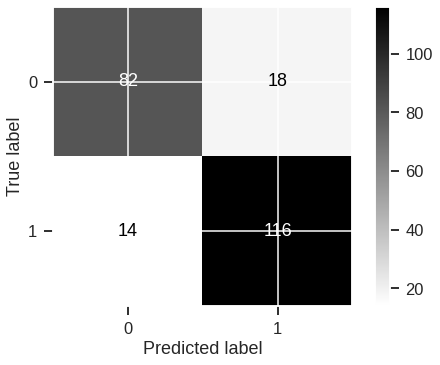

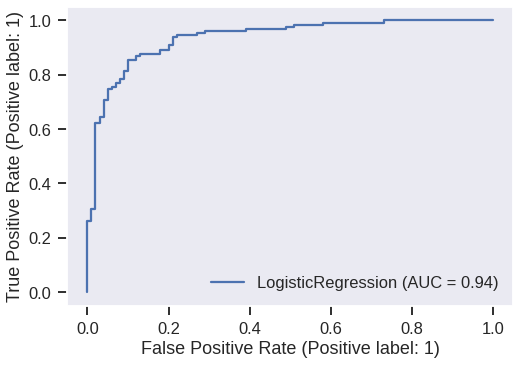

In [32]:
dfmin = pd.concat([X_train.min(), X_test.min()], axis=1).min(axis=1)
dfmax = pd.concat([X_train.max(), X_test.max()], axis=1).max(axis=1)
X_train = (X_train-dfmin)/(dfmax-dfmin)
X_test = (X_test-dfmin)/(dfmax-dfmin)
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))
plot_confusion_matrix(lr, X_test, y_test,cmap="binary") 
metrics.plot_roc_curve(lr, X_test, y_test) 
plt.grid(False)
plt.show()

0.8478260869565217


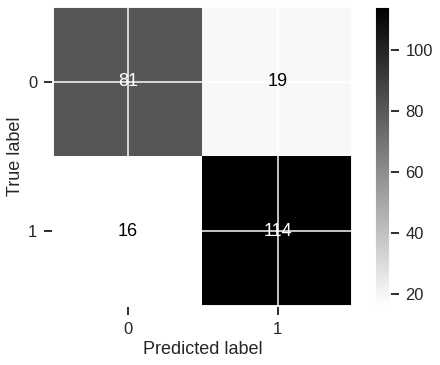

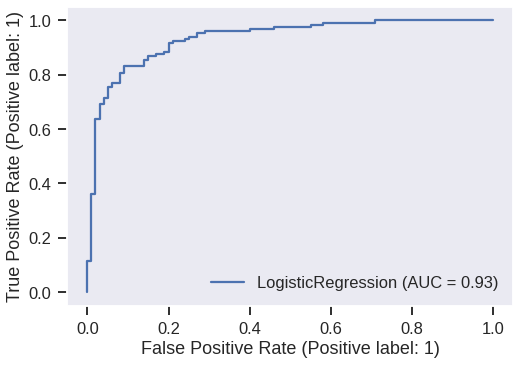

In [33]:
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train_delCols,y_train_delCols)
pred = lr.predict(X_test_delCols)
print(metrics.accuracy_score(pred,y_test_delCols))
plot_confusion_matrix(lr, X_test_delCols, y_test_delCols,cmap="binary") 
metrics.plot_roc_curve(lr, X_test_delCols, y_test_delCols) 
plt.grid(False)
plt.show()

0.8556149732620321


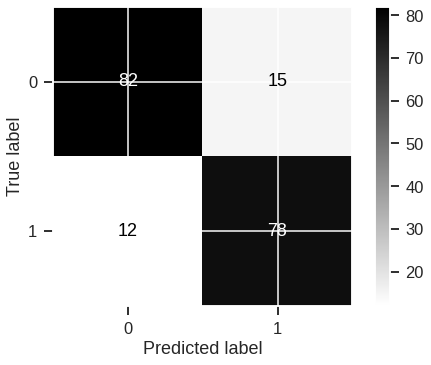

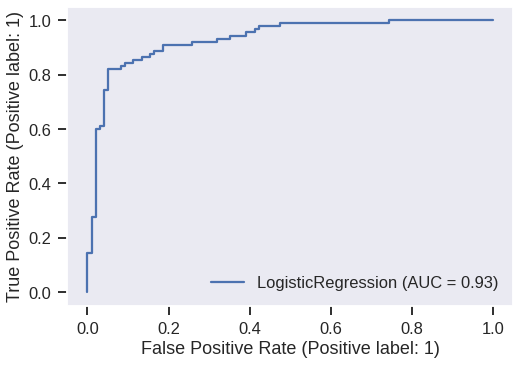

In [34]:
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train_delRows,y_train_delRows)
pred = lr.predict(X_test_delRows)
print(metrics.accuracy_score(pred,y_test_delRows))
plot_confusion_matrix(lr, X_test_delRows, y_test_delRows,cmap="binary") 
metrics.plot_roc_curve(lr, X_test_delRows, y_test_delRows) 
plt.grid(False)
plt.show()

0.8521739130434782


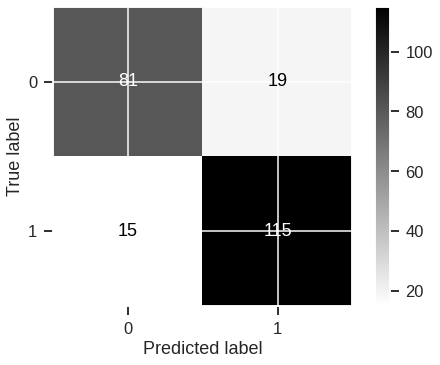

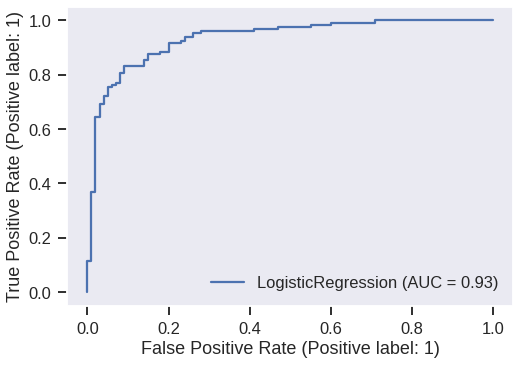

In [35]:
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train_addMean,y_train_addMean)
pred = lr.predict(X_test_addMean)
print(metrics.accuracy_score(pred,y_test_addMean))
plot_confusion_matrix(lr, X_test_addMean, y_test_addMean,cmap="binary")
metrics.plot_roc_curve(lr, X_test_addMean, y_test_addMean) 

plt.grid(False)
plt.show()

0.8826086956521739


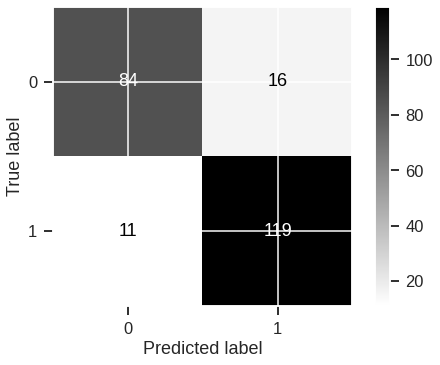

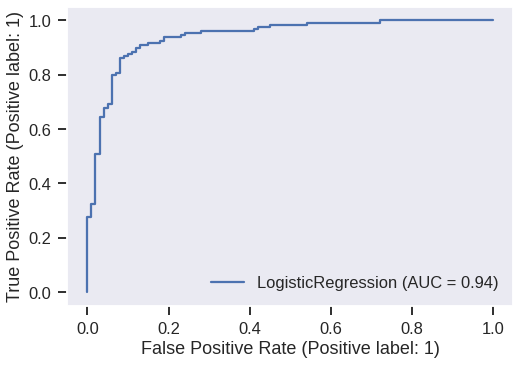

In [36]:
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train_addCol,y_train_addCol)
pred = lr.predict(X_test_addCol)
print(metrics.accuracy_score(pred,y_test_addCol))
plot_confusion_matrix(lr, X_test_addCol, y_test_addCol,cmap="binary") 
metrics.plot_roc_curve(lr, X_test_addCol, y_test_addCol) 

plt.grid(False)
plt.show()

The best way is **Imputation with an additional column**


# Logistic Regression with Gradient Ascent

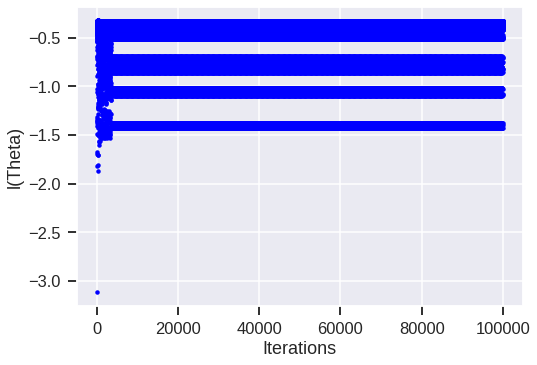

In [37]:
training_data_matrix = X_train_addCol.to_numpy()
target_array = y_train_addCol.to_numpy()
column_of_ones = np.ones(shape=(training_data_matrix.shape[0], 1))
training_data_matrix = np.hstack((column_of_ones, training_data_matrix))
theta0 = np.zeros((training_data_matrix.shape[1]))
theta_final, log_l_history = gradient_ascent(theta0, training_data_matrix, target_array, lr=0.01 , num_steps=100000)

fig,ax = plt.subplots(num=2)
ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)),log_l_history,'b.')

In [38]:
test_data_matrix = X_test_addCol.to_numpy()
target_array = y_test_addCol.to_numpy()

column_of_ones = np.ones(shape=(test_data_matrix.shape[0], 1))
test_data_matrix = np.hstack((column_of_ones, test_data_matrix))

In [39]:
survived_array = predictions(test_data_matrix, theta_final).flatten()

Survived_series = pd.Series(data=survived_array, index=X_test_addCol.index)
X_test_addCol_f = X_test_addCol.copy()
X_test_addCol_f.insert(0, "T", Survived_series)


In [40]:
print(y_test_addCol.shape[0])

230


In [41]:
correct = np.sum((np.rint(X_test_addCol_f["T"])) == y_test_addCol)
print(correct/y_test_addCol.shape[0])

0.8826086956521739


https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

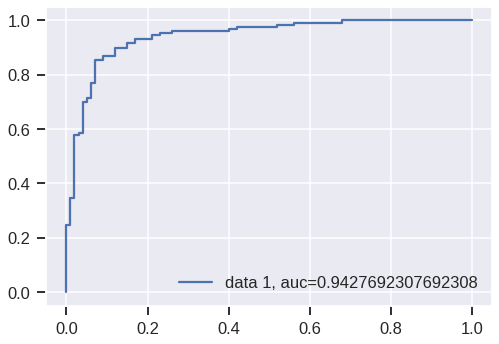

In [42]:
fpr, tpr, _ = metrics.roc_curve(y_test_addCol,X_test_addCol_f["T"])
auc = metrics.roc_auc_score(y_test_addCol,X_test_addCol_f["T"])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

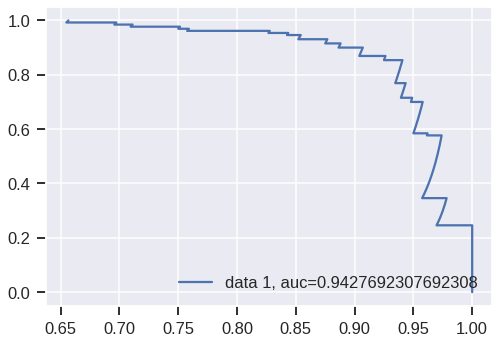

In [43]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test_addCol,X_test_addCol_f["T"])
plt.plot(precision,recall,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Stochastic Gradient Descent

0.8869565217391304


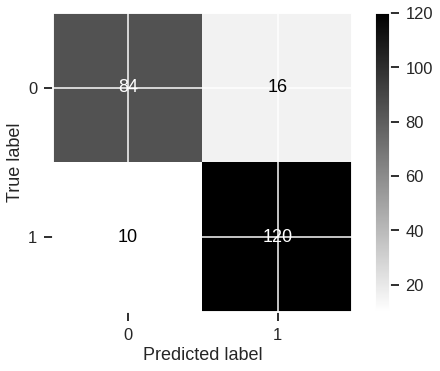

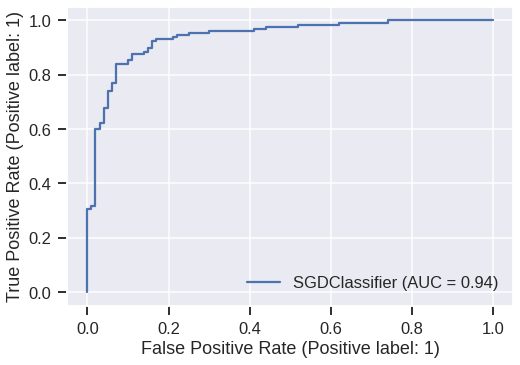

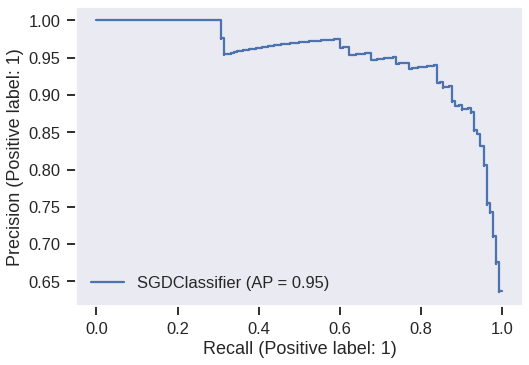

In [44]:

clf = SGDClassifier(loss='log', max_iter=100000, alpha=0.01)
clf.fit(X_train_addCol,y_train_addCol)
pred = clf.predict(X_test_addCol)
print(metrics.accuracy_score(pred,y_test_addCol))
plot_confusion_matrix(clf, X_test_addCol, y_test_addCol,cmap="binary") 
metrics.plot_roc_curve(clf, X_test_addCol, y_test_addCol) 
metrics.plot_precision_recall_curve(clf, X_test_addCol, y_test_addCol) 


plt.grid(False)
plt.show()

# Gaussian discriminant analysis 

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

0.8826086956521739


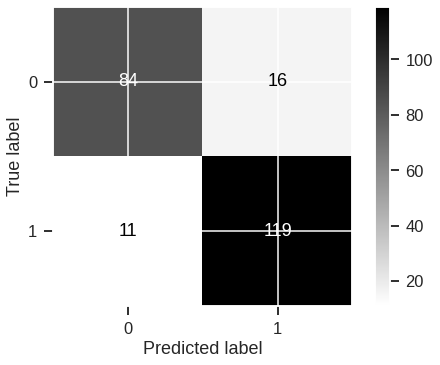

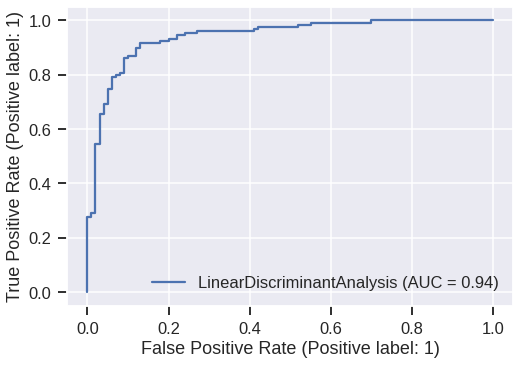

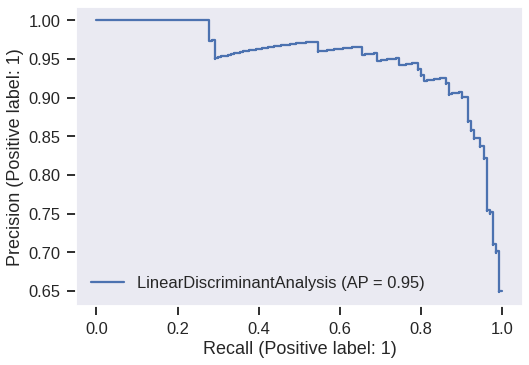

In [45]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_addCol,y_train_addCol)
pred = clf.predict(X_test_addCol)
print(metrics.accuracy_score(pred,y_test_addCol))
plot_confusion_matrix(clf, X_test_addCol, y_test_addCol,cmap="binary") 
metrics.plot_roc_curve(clf, X_test_addCol, y_test_addCol) 
metrics.plot_precision_recall_curve(clf, X_test_addCol, y_test_addCol) 


plt.grid(False)
plt.show()

# Naive Bayes

0.8739130434782608


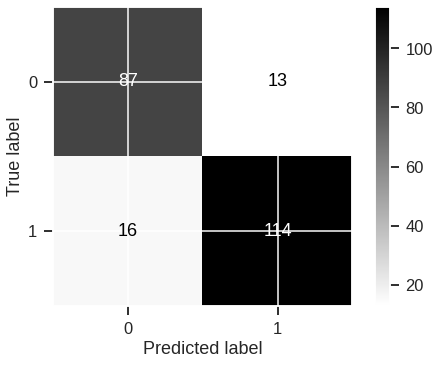

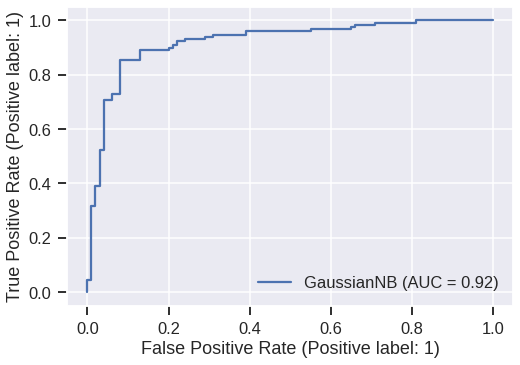

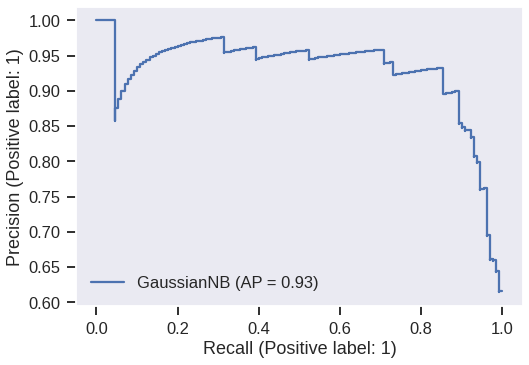

In [46]:
clf = GaussianNB()
clf.fit(X_train_addCol,y_train_addCol)
pred = clf.predict(X_test_addCol)
print(metrics.accuracy_score(pred,y_test_addCol))
plot_confusion_matrix(clf, X_test_addCol, y_test_addCol,cmap="binary") 
metrics.plot_roc_curve(clf, X_test_addCol, y_test_addCol) 
metrics.plot_precision_recall_curve(clf, X_test_addCol, y_test_addCol) 


plt.grid(False)
plt.show()

0.8913043478260869


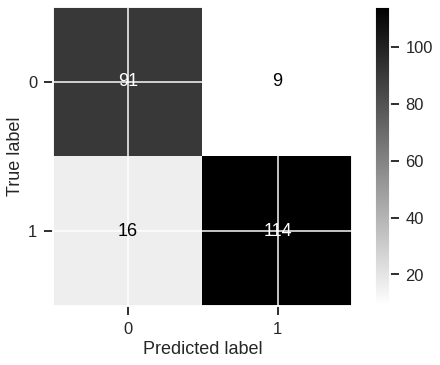

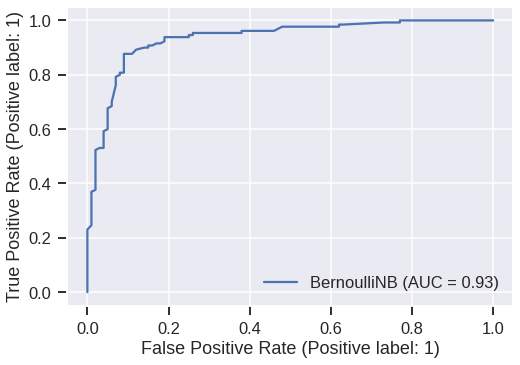

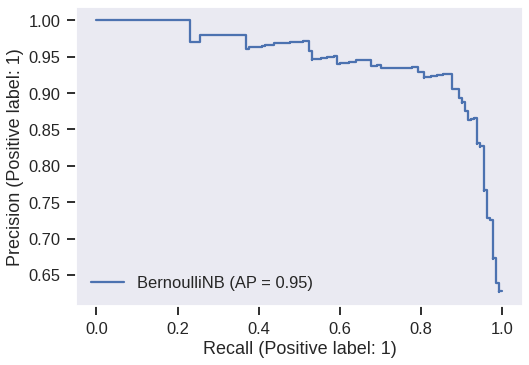

In [47]:
clf = BernoulliNB()
clf.fit(X_train_addCol,y_train_addCol)
pred = clf.predict(X_test_addCol)
print(metrics.accuracy_score(pred,y_test_addCol))
plot_confusion_matrix(clf, X_test_addCol, y_test_addCol,cmap="binary") 
metrics.plot_roc_curve(clf, X_test_addCol, y_test_addCol) 
metrics.plot_precision_recall_curve(clf, X_test_addCol, y_test_addCol) 
plt.grid(False)
plt.show()

0.8826086956521739


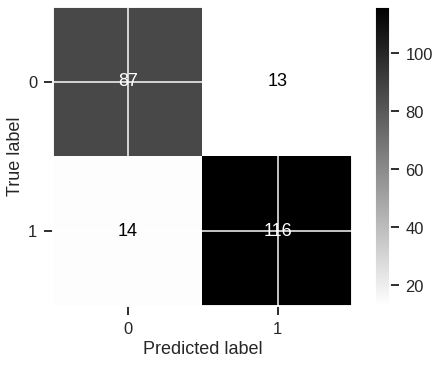

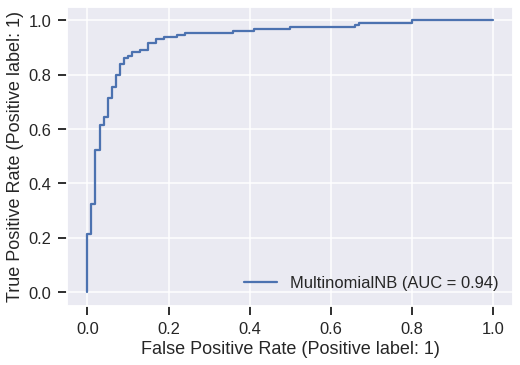

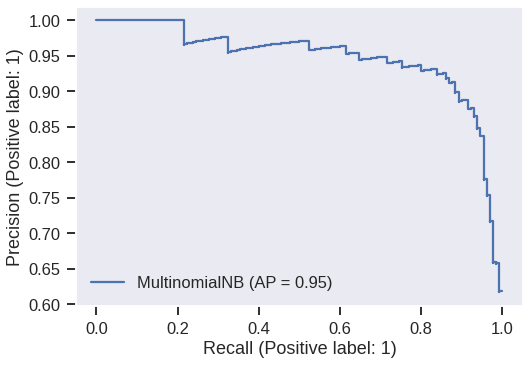

In [48]:
clf = MultinomialNB()
clf.fit(X_train_addCol,y_train_addCol)
pred = clf.predict(X_test_addCol)
print(metrics.accuracy_score(pred,y_test_addCol))
plot_confusion_matrix(clf, X_test_addCol, y_test_addCol,cmap="binary") 
metrics.plot_roc_curve(clf, X_test_addCol, y_test_addCol)
metrics.plot_precision_recall_curve(clf, X_test_addCol, y_test_addCol) 

plt.grid(False)
plt.show()